In [ ]:
x = 1

In [3]:
import torch
print(torch.cuda.is_available())  # Should return True if CUDA is available
print(torch.version.cuda)         # Should print your CUDA version, e.g


True
12.1


^C


In [1]:

import networkx as nx
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import torch
from torch_geometric.data import Data
from torch_geometric import utils
from environment_manager import *
name = "240318-initial parsing"
env = load_create_environment(name)


Setting environment variables
Copying vanilla components
File copied successfully from C:\Users\jossi\Dropbox\Office_Work\Jos\GH_Graph_Learning\Grasshopper Components\240318-VanillaComponents\vanilla_components.csv to ExtractionEnvironments\240318-initial parsing\00-VanillaComponents\vanilla_components.csv.
Copying components
Copying gh files


In [2]:
GHComponentTable.initialise()


In [3]:
import System
doc = GHProcessor.get_ghdoc(r"C:\Users\jossi\Dropbox\Office_Work\Jos\GH_Graph_Learning\ExtractionEnvironments\240318-initial parsing\03-GH_Files\03b-Processed\loft wrong_2021May6a.gh")


In [4]:
canvas = Canvas("logy", doc, env)
graph = GHGraph(canvas)
graph.save_graph(Path(r"C:\Users\jossi\Dropbox\Office_Work\Jos\GH_Graph_Learning\ExtractionEnvironments\240318-initial parsing\03-GH_Files\03b-Processed\loft wrong_2021May6a.graphml"))
# Iterate over edges with their attributes
# e = []
# print(G.nodes(data=True))
# for u, v, attr in G.edges(data=True):
#     # print(f"Edge {u}-{v} has attributes {attr}")
#     e.append(u[0])
# e

In [4]:
for x in e:
    print(GHComponentTable.idx_to_component(x))

NameError: name 'e' is not defined

In [6]:
file = r"C:\Users\jossi\Dropbox\Office_Work\Jos\GH_Graph_Learning\ExtractionEnvironments\240318-initial parsing\03-GH_Files\03b-Processed\loft wrong_2021May6a.graphml"
G = nx.read_graphml(file)
data_g = utils.from_networkx(G)
# for x in data_g['guid']:
#     print(x)

ids = [x for x in data_g['guid']]
print(ids)
names = []
for x in ids:
    n = GHComponentTable.component_dict.get(System.Guid(x)).Desc.Name
    
    print(n)

['deaf8653-5528-4286-807c-3de8b8dad781', '3b112fb6-3eba-42d2-ba75-0f903c18faab', '59daf374-bc21-4a5e-8282-5504fb7ae9ae', '4f8984c4-7c7a-4d69-b0a2-183cbb330d20', '79f9fbb3-8f1d-4d9a-88a9-f7961b1012cd', '57da07bd-ecab-415d-9d86-af36d7073abc', '9333c5b3-11f9-423c-bbb5-7e5156430219', '57da07bd-ecab-415d-9d86-af36d7073abc', 'a7a41d0a-2188-4f7a-82cc-1a2c4e4ec850', 'd0a1b843-873d-4d1d-965c-b5423b35f327']
Surface
Contour
List Item
Plane
Unit X
Number Slider
Rebuild Curve
Number Slider
Loft
Connect Curves


In [6]:
graph_folder = r'C:\Users\jossi\Dropbox\Office_Work\Jos\GH_Graph_Learning\ExtractionEnvironments\240318-initial parsing\05-GraphML'
# Initialize an empty list to store dictionaries
data_list = []
graph_list = []
for file in os.listdir(graph_folder):
    if file.endswith('.graphml'):
        print(file)
        G = nx.read_graphml(os.path.join(graph_folder, file))
        # Skip files with no nodes to avoid division by zero
        if G.number_of_nodes() == 0:
            continue
        graph_list.append(G)

        avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
        dictions = {'file': file, 'nodes': G.number_of_nodes(), 'edges': G.number_of_edges(), 'avg_degree': avg_degree}
        
        # Append the dictionary to the list
        data_list.append(dictions)



00 - PROJECT TEXT.graphml
00.graphml
00915-CS-GH-LivePlanExport.graphml
00915-WE-GH-A-Corner Mullions.graphml
00915-WEA-XX-XX-GH-20-Columns - 160412.graphml
00915-WEA-XX-XX-GH-20-Revised Columns - 160412.graphml
00_sheared_cone_surface.graphml
00_simple_particles.graphml
00_TEMPLATE_BAKERY.graphml
01 Facade Area Takeoff.graphml
01 simple diffuse.graphml
01- TextTag.graphml
01.graphml
01533-HKUST-InnovationBuilding-BridgeNotWorking.graphml
01533-HKUST-InnovationBuilding-Manual Drawing.graphml
01533.graphml
01599_Sketch ModelsJS.graphml
01659-Orientations_updated.graphml
01_collisions.graphml
01_sheared_cone_panelization.graphml
02 - Text3d.graphml
02 many materials.graphml
02.graphml
02_fluids_a.graphml
03 simple referenced geometry.graphml
03-anim.graphml
03.graphml
03_fluids_b.graphml
04 - TextExplode.graphml
04 simple animation.graphml
04_fluids_archimedian_screw.graphml
05 simple bump maps.graphml
05_spring_constraints.graphml
06 simple parameter injector.graphml
06_spring_constrain

In [7]:
print(type(graph_list[0]))

<class 'networkx.classes.digraph.DiGraph'>


In [8]:
data = [utils.from_networkx(G) for G in graph_list]

In [9]:
ids= [d.get('identifier') for i,d in enumerate(data)]
flattened = [x.item() for id in ids for x in id]

In [10]:
len(flattened)

176865

In [37]:
#count the frequency of each identifier in flattened
from collections import Counter
counter = Counter(flattened)
GHComponentTable.initialise()
counts = {}
for k in list(counter.keys()):
    print(f"{k}, {GHComponentTable.idx_to_component(k)}, {counter[k]}")
    compname = GHComponentTable.idx_to_component(k)
    counts[k] = counter[k]
# 
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
sorted_counts

99, InCircle, 270
635, Project, 20231
647, Scale NU, 2939
660, ArrRec, 1157
894, A/B, 127
1040, MDif, 1462
1036, ConMesh, 616
1601, Dom+, 12
791, F(x,y,z), 285
342, Scribble, 951
644, Rotate, 12490
135, Rec 2Pt, 989
551, RigidBody, 1998
418, Linear Dimension, 1578
1586, Tap, 7
432, Block Definition, 714
348, Tracker, 446
363, View, 1515
421, Ordinate Dimension, 1847
1287, VAdd, 413
484, Materials, 102
1285, Rev, 89
559, SolidPlaneCollide, 5798
618, CO, 725
1096, PlaneSrf, 3046
174, Points, 557
817, Series, 475
991, SubDFaces, 266
1035, DeMesh, 675
779, Var, 504
834, 1/x, 1135
787, Eval, 830
607, dupLn, 713
800, CharSeq, 908
633, Project, 1384
534, LengthRatio, 1664
646, Scale, 738
390, Input, 447
799, ATan, 6063
673, Dup, 443
1474, Meta-Vector, 4
536, LS, 1336
987, SubDBox, 3938
74, CircleTTT, 970
45, Get File Path, 1975
1097, PxB, 737
164, Fancy Curves, 58
824, ASin, 429
118, Line, 19
662, Split, 119
788, Eval, 230
805, Fac, 3306
772, Bnd, 409
125, OffsetS, 45
574, Wind, 122
1094, Cyl

{1126: 20832,
 635: 20231,
 644: 12490,
 799: 6063,
 559: 5798,
 987: 3938,
 805: 3306,
 1096: 3046,
 647: 2939,
 71: 2258,
 1028: 2102,
 551: 1998,
 45: 1975,
 421: 1847,
 845: 1791,
 534: 1664,
 384: 1591,
 418: 1578,
 363: 1515,
 904: 1468,
 1040: 1462,
 633: 1384,
 536: 1336,
 869: 1297,
 68: 1285,
 47: 1274,
 660: 1157,
 834: 1135,
 65: 1018,
 135: 989,
 449: 981,
 74: 970,
 342: 951,
 915: 944,
 892: 942,
 79: 915,
 800: 908,
 41: 904,
 579: 882,
 88: 872,
 787: 830,
 23: 830,
 785: 796,
 878: 745,
 49: 742,
 646: 738,
 1097: 737,
 618: 725,
 56: 724,
 432: 714,
 607: 713,
 823: 690,
 871: 681,
 1035: 675,
 841: 665,
 879: 660,
 1041: 656,
 781: 652,
 840: 631,
 654: 631,
 794: 623,
 1036: 616,
 862: 574,
 174: 557,
 1926: 538,
 560: 533,
 91: 525,
 48: 520,
 864: 506,
 779: 504,
 537: 489,
 817: 475,
 62: 458,
 390: 447,
 348: 446,
 868: 445,
 673: 443,
 792: 443,
 775: 443,
 824: 429,
 995: 419,
 923: 418,
 1287: 413,
 1044: 413,
 772: 409,
 105: 405,
 410: 389,
 413: 387,
 110

<Axes: >

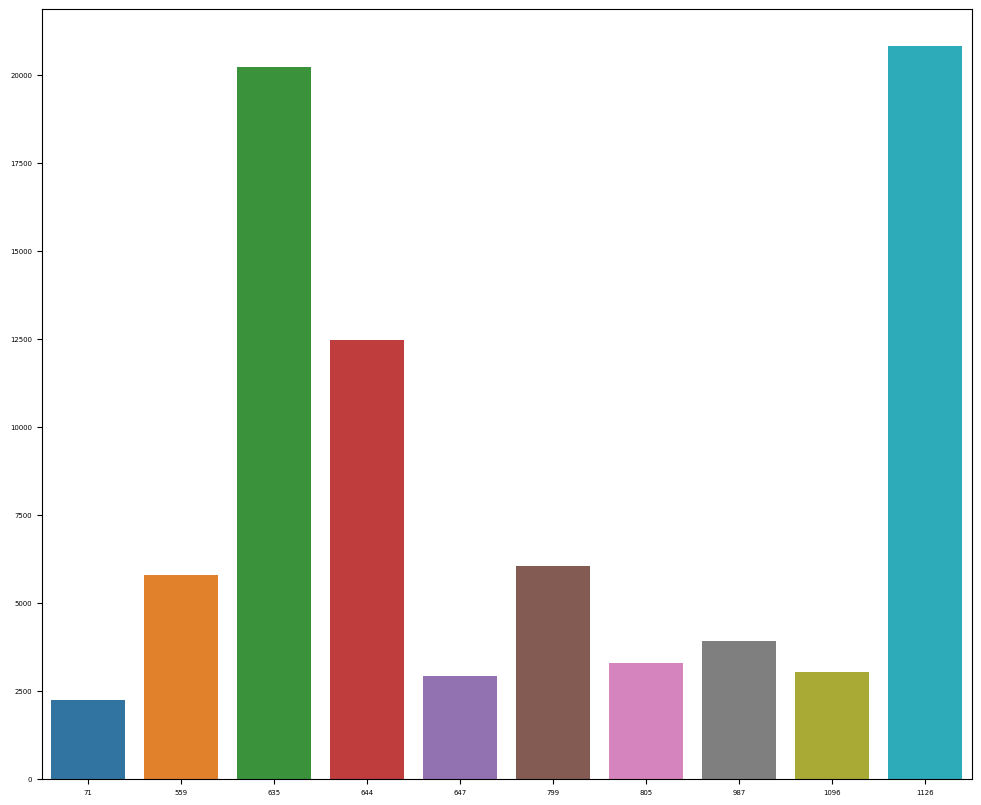

In [35]:
import matplotlib.pyplot as plt

# Set the font size globally
plt.rcParams.update({'font.size': 5})  
plt.figure(figsize=(12, 10))
n = 10
x = list(sorted_counts.keys())[:n]
y = list(sorted_counts.values())[:n]
sns.barplot(x=x, y=y)